<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(3_6)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.214523,74.323571,69.460267,96.516671,2915.605899,3249.120931,618.233868,2630.887063
1,0.0,1.0,26.621668,40.206809,55.976722,35.796158,-831.405762,-662.804405,-692.084250,29.279845
2,0.0,2.0,34.339825,62.923957,84.717812,44.349640,-1594.382797,-1358.051563,-510.126846,-847.924717
3,0.0,3.0,44.446091,41.015503,27.192041,23.009599,-753.078660,-607.415427,-679.157677,71.742251
4,0.0,4.0,23.525563,29.309520,69.044040,75.029601,-321.085992,-114.177268,-228.491821,114.314553
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.330046,91.921060,40.547337,81.958991,294.342305,613.099739,-332.145297,945.245036
59996,999.0,56.0,58.281962,51.323418,63.392267,81.296814,-1118.436257,-854.141797,33.485610,-887.627407
59997,999.0,57.0,84.703580,29.534769,45.542064,89.683372,-551.133459,-291.669674,-195.795310,-95.874364
59998,999.0,58.0,62.124815,84.412766,62.263476,61.903694,-2930.135363,-2649.430612,174.612173,-2824.042785


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.214523,74.323571,69.460267,96.516671,2915.605899,3249.120931,618.233868,2630.887063
1,0.0,1.0,26.621668,40.206809,55.976722,35.796158,-831.405762,-662.804405,-692.084250,29.279845
2,0.0,2.0,34.339825,62.923957,84.717812,44.349640,-1594.382797,-1358.051563,-510.126846,-847.924717
3,0.0,3.0,44.446091,41.015503,27.192041,23.009599,-753.078660,-607.415427,-679.157677,71.742251
4,0.0,4.0,23.525563,29.309520,69.044040,75.029601,-321.085992,-114.177268,-228.491821,114.314553
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.330046,91.921060,40.547337,81.958991,294.342305,613.099739,-332.145297,945.245036
59996,999.0,56.0,58.281962,51.323418,63.392267,81.296814,-1118.436257,-854.141797,33.485610,-887.627407
59997,999.0,57.0,84.703580,29.534769,45.542064,89.683372,-551.133459,-291.669674,-195.795310,-95.874364
59998,999.0,58.0,62.124815,84.412766,62.263476,61.903694,-2930.135363,-2649.430612,174.612173,-2824.042785


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,83.214523,74.323571,69.460267,96.516671,2915.605899,3249.120931,618.233868,2630.887063
1,0.0,1.0,26.621668,40.206809,55.976722,35.796158,-831.405762,-662.804405,-692.084250,29.279845
2,0.0,2.0,34.339825,62.923957,84.717812,44.349640,-1594.382797,-1358.051563,-510.126846,-847.924717
3,0.0,3.0,44.446091,41.015503,27.192041,23.009599,-753.078660,-607.415427,-679.157677,71.742251
4,0.0,4.0,23.525563,29.309520,69.044040,75.029601,-321.085992,-114.177268,-228.491821,114.314553
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,94.330046,91.921060,40.547337,81.958991,294.342305,613.099739,-332.145297,945.245036
59996,999.0,56.0,58.281962,51.323418,63.392267,81.296814,-1118.436257,-854.141797,33.485610,-887.627407
59997,999.0,57.0,84.703580,29.534769,45.542064,89.683372,-551.133459,-291.669674,-195.795310,-95.874364
59998,999.0,58.0,62.124815,84.412766,62.263476,61.903694,-2930.135363,-2649.430612,174.612173,-2824.042785


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    83.214523  74.323571  69.460267  96.516671  2915.605899   
      1.0    26.621668  40.206809  55.976722  35.796158  -831.405762   
      2.0    34.339825  62.923957  84.717812  44.349640 -1594.382797   
      3.0    44.446091  41.015503  27.192041  23.009599  -753.078660   
      4.0    23.525563  29.309520  69.044040  75.029601  -321.085992   
...                ...        ...        ...        ...          ...   
999.0 55.0   94.330046  91.921060  40.547337  81.958991   294.342305   
      56.0   58.281962  51.323418  63.392267  81.296814 -1118.436257   
      57.0   84.703580  29.534769  45.542064  89.683372  -551.133459   
      58.0   62.124815  84.412766  62.263476  61.903694 -2930.135363   
      59.0   20.731125  89.710744  64.930015  43.098367   613.985454   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    3249.120931  618.233868  2630.887063  
      1.0    -662.804405 -692.084250    29.279845  
      2.0   -1358.051563 -510.126846  -847.924717  
      3.0    -607.415427 -679.157677    71.742251  
      4.0    -114.177268 -228.491821   114.314553  
...                  ...         ...          ...  
999.0 55.0    613.099739 -332.145297   945.245036  
      56.0   -854.141797   33.485610  -887.627407  
      57.0   -291.669674 -195.795310   -95.874364  
      58.0  -2649.430612  174.612173 -2824.042785  
      59.0    842.455706  647.128039   195.327667  

[60000 rows x 8 columns]

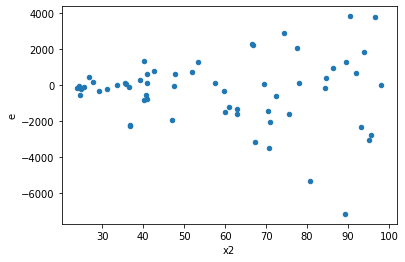

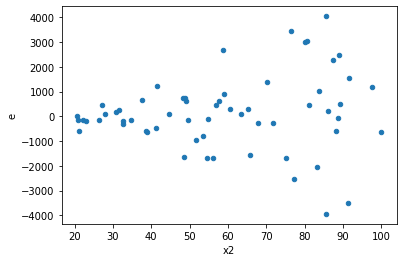

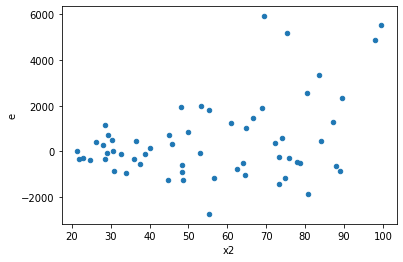

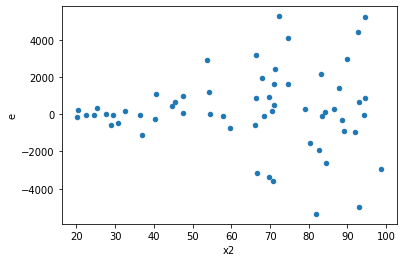

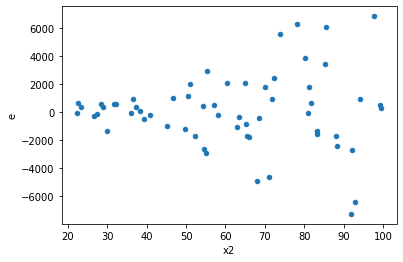

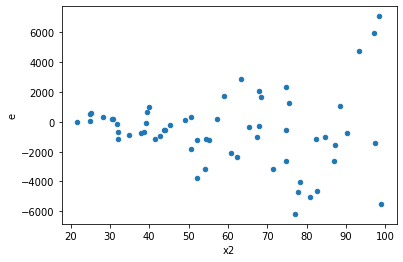

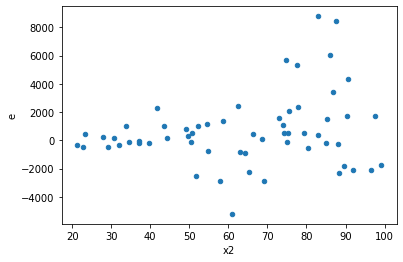

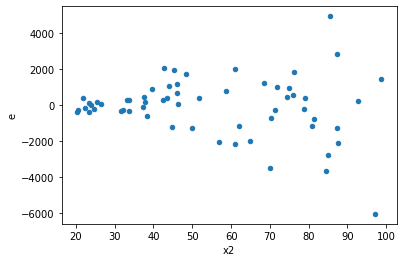

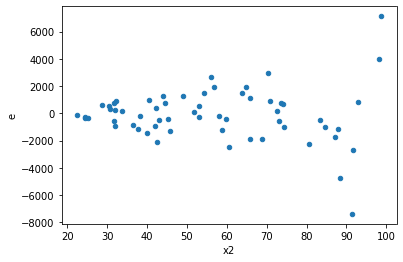

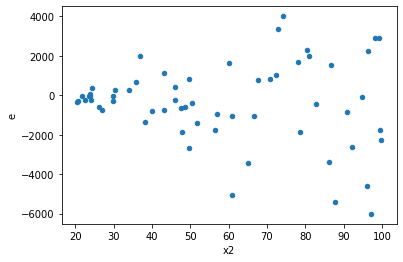

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,14242345.929892516,144596125.89203736,712117.2964946257,7229806.294601868,10.15254976980668,2.8944409711240127e-06,0.9999985527795144,1.4472204855620063e-06,Reject005=0 : Heteroscedasticity
1.0,20.0,20.0,7581773.245669925,75218070.14957543,379088.66228349623,3760903.5074787713,9.920907380411792,3.510787788485459e-06,0.9999982446061058,1.7553938942427294e-06,Reject005=0 : Heteroscedasticity
2.0,20.0,20.0,9499825.400943974,64355887.816327564,474991.2700471987,3217794.3908163784,6.774428486857525,7.52033851487699e-05,0.9999623983074256,3.760169257438495e-05,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,9942166.013235705,141271197.62830806,497108.30066178524,7063559.8814154025,14.209297796902403,1.603772361580269e-07,0.9999999198113819,8.018861807901345e-08,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,18627386.82739714,271221555.04773253,931369.3413698571,13561077.752386626,14.560365206397075,1.2930428372470715e-07,0.9999999353478581,6.465214186235357e-08,Reject005=0 : Heteroscedasticity
5.0,20.0,20.0,7745529.976836771,253484408.62138116,387276.49884183856,12674220.431069057,32.72654155098922,7.588907280364765e-11,0.9999999999620555,3.7944536401823825e-11,Reject005=0 : Heteroscedasticity
6.0,20.0,20.0,21024725.757075895,174903203.50989717,1051236.2878537946,8745160.175494859,8.31892912805454,1.4904212066957356e-05,0.9999925478939665,7.452106033478678e-06,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,5187731.537165031,86909589.83418429,259386.57685825153,4345479.491709215,16.75290812787091,3.705346141025245e-08,0.9999999814732693,1.8526730705126226e-08,Reject005=0 : Heteroscedasticity
8.0,20.0,20.0,14389485.11367073,172134041.23587957,719474.2556835364,8606702.06179398,11.962487877508812,7.182308467967857e-07,0.9999996408845766,3.5911542339839286e-07,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,14242345.929892516,144596125.89203736,712117.2964946257,7229806.294601868,10.15254976980668,2.8944409711240127e-06,Reject005=0 : Heteroscedasticity
1.0,20.0,20.0,7581773.245669925,75218070.14957543,379088.66228349623,3760903.5074787713,9.920907380411792,3.510787788485459e-06,Reject005=0 : Heteroscedasticity
2.0,20.0,20.0,9499825.400943974,64355887.816327564,474991.2700471987,3217794.3908163784,6.774428486857525,7.52033851487699e-05,Reject005=0 : Heteroscedasticity
3.0,20.0,20.0,9942166.013235705,141271197.62830806,497108.30066178524,7063559.8814154025,14.209297796902403,1.603772361580269e-07,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,18627386.82739714,271221555.04773253,931369.3413698571,13561077.752386626,14.560365206397075,1.2930428372470715e-07,Reject005=0 : Heteroscedasticity
5.0,20.0,20.0,7745529.976836771,253484408.62138116,387276.49884183856,12674220.431069057,32.72654155098922,7.588907280364765e-11,Reject005=0 : Heteroscedasticity
6.0,20.0,20.0,21024725.757075895,174903203.50989717,1051236.2878537946,8745160.175494859,8.31892912805454,1.4904212066957356e-05,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,5187731.537165031,86909589.83418429,259386.57685825153,4345479.491709215,16.75290812787091,3.705346141025245e-08,Reject005=0 : Heteroscedasticity
8.0,20.0,20.0,14389485.11367073,172134041.23587957,719474.2556835364,8606702.06179398,11.962487877508812,7.182308467967857e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64